In [1]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [3]:
import pandas as pd

# 1. Import a data set from a CSV file
data = pd.read_csv(URL)

# 2. Generate the statistical description of all the features
description = data.describe(include='all')

print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

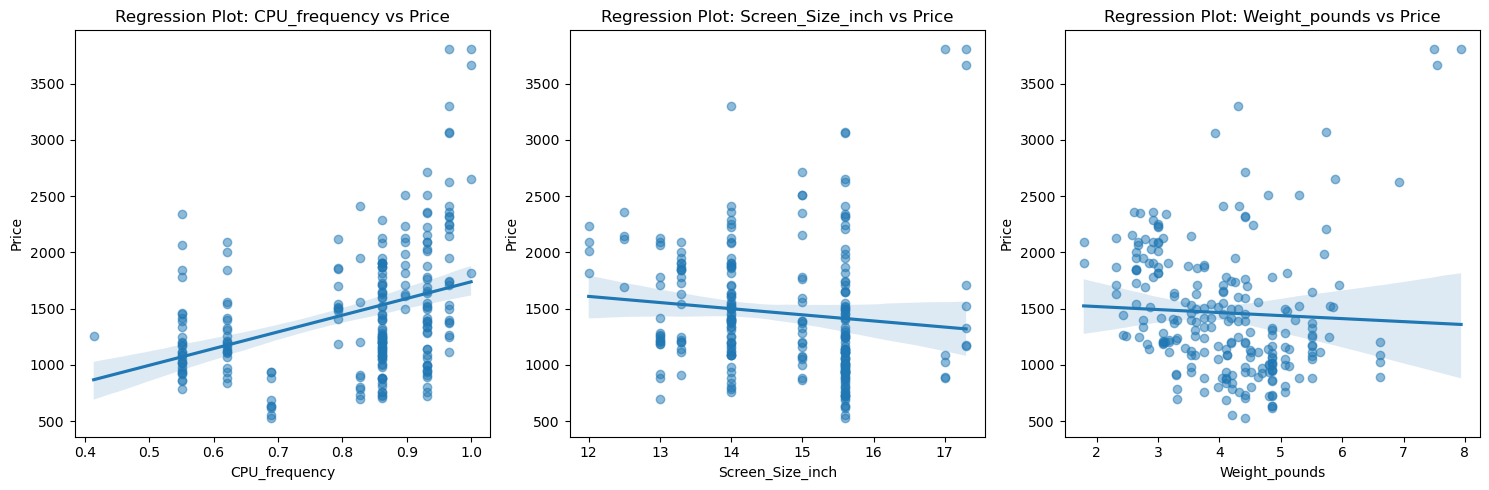

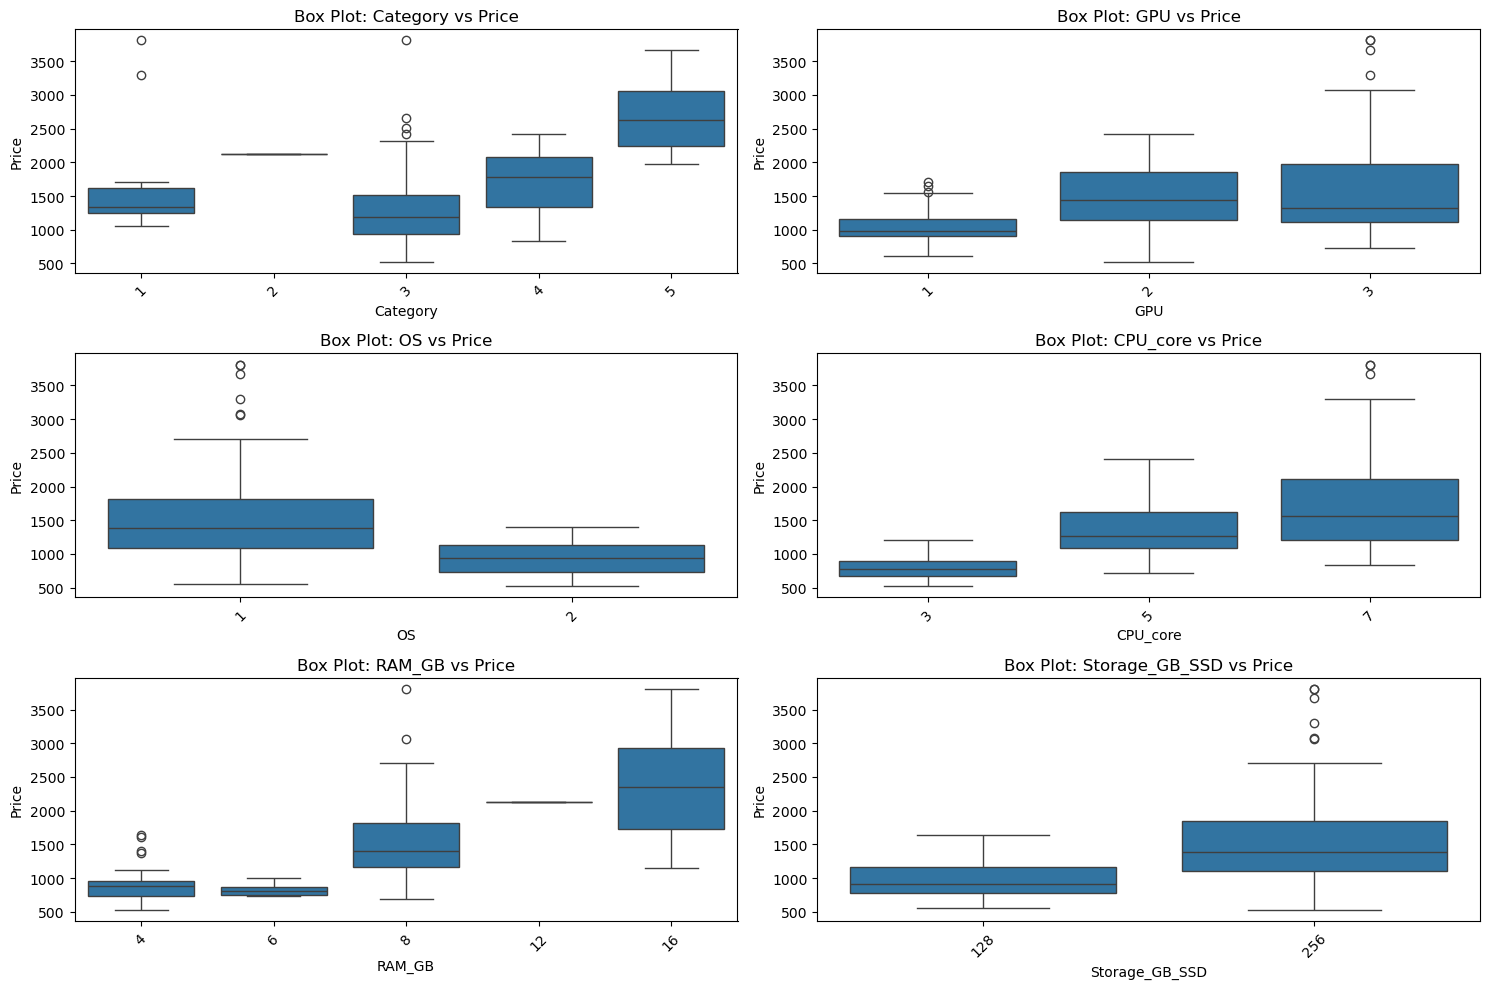

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming 'data' is a DataFrame already loaded)
# data = pd.read_csv("your_dataset.csv")  # Uncomment if loading from a CSV

# 1. Regression plots
features_reg = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_reg, 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=data[feature], y=data["Price"], scatter_kws={"alpha": 0.5})
    plt.title(f'Regression Plot: {feature} vs Price')
plt.tight_layout()
plt.show()

# 2. Box plots
features_box = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_box, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[feature], y=data["Price"])
    plt.xticks(rotation=45)
    plt.title(f'Box Plot: {feature} vs Price')
plt.tight_layout()
plt.show()


In [11]:
from scipy.stats import pearsonr

# 3. Correlation, Pearson Coefficient, and p-values
numerical_features = data.select_dtypes(include=['number']).columns
results = []
for feature in numerical_features:
    if feature != "Price":
        corr_value = data[feature].corr(data["Price"])
        pearson_coef, p_value = pearsonr(data[feature], data["Price"])
        results.append({"Feature": feature, "Correlation": corr_value, "Pearson Coefficient": pearson_coef, "P-value": p_value})

correlation_df = pd.DataFrame(results)

print(correlation_df)

             Feature  Correlation  Pearson Coefficient       P-value
0       Unnamed: 0.1     0.321933             0.321933  3.851058e-07
1         Unnamed: 0     0.321933             0.321933  3.851058e-07
2           Category     0.286243             0.286243  7.225696e-06
3                GPU     0.288298             0.288298  6.166950e-06
4                 OS    -0.221730            -0.221730  5.696643e-04
5           CPU_core     0.459398             0.459398  7.912950e-14
6   Screen_Size_inch    -0.110644            -0.110644  8.853398e-02
7      CPU_frequency     0.366666             0.366666  5.502463e-09
8             RAM_GB     0.549297             0.549297  3.681561e-20
9     Storage_GB_SSD     0.243421             0.243421  1.489892e-04
10     Weight_pounds    -0.050312            -0.050312  4.397694e-01
11    Screen-Full_HD    -0.021075            -0.021075  7.463568e-01
12  Screen-IPS_panel     0.021075             0.021075  7.463568e-01


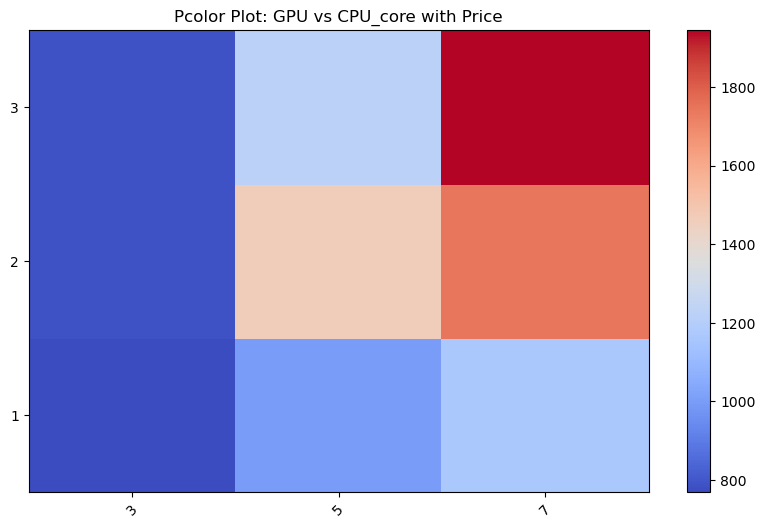

In [13]:
import numpy as np
# 4. Pivot table and pcolor plot
pivot_table = data.pivot_table(values="Price", index="GPU", columns="CPU_core", aggfunc="mean")
plt.figure(figsize=(10, 6))
plt.pcolor(pivot_table, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), pivot_table.columns, rotation=45)
plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index)
plt.title("Pcolor Plot: GPU vs CPU_core with Price")
plt.show()


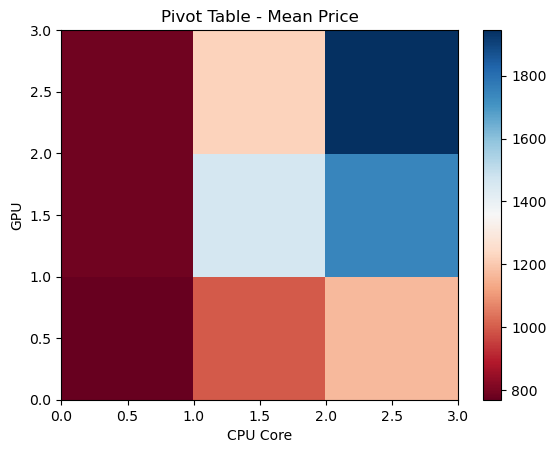

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the attributes
grouped_data = data.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(data, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()